# ⏩ Sequential Agent Workflows with GitHub Models (Python)

## 📋 Advanced Sequential Processing Tutorial

This notebook demonstrates **sequential workflow patterns** using the Microsoft Agent Framework. You'll learn how to build sophisticated multi-step processing pipelines where agents execute in a specific order, passing data and context between stages.

## 🎯 Learning Objectives

### 🔄 **Sequential Processing Patterns**
- **Linear Workflow Design**: Create step-by-step processing pipelines
- **Data Flow Management**: Pass information between sequential agents
- **Stage-Gate Processing**: Implement checkpoints and validation stages
- **Progress Tracking**: Monitor workflow execution and intermediate results

### 🏗️ **Enterprise Pipeline Architecture**
- **Business Process Modeling**: Map real business processes to agent workflows
- **Quality Assurance**: Multi-stage validation and review processes
- **Document Processing**: Sequential document analysis and transformation
- **Content Production**: Editorial workflows with review and approval stages

### 📊 **Advanced Workflow Features**
- **Context Preservation**: Maintain state across workflow stages
- **Error Propagation**: Handle failures in sequential processing
- **Performance Optimization**: Efficient sequential execution patterns
- **Audit Trails**: Complete tracking of sequential operations

## ⚙️ Prerequisites & Setup

### 📦 **Dependencies**
```bash
# Install Agent Framework with workflow capabilities
pip uninstall agent-framework -y
pip uninstall agent-framework-azure-ai -y
pip install -r ../../../Installation/requirements.txt --constraint ../../../Installation/constraints.txt -U
```

### 🔑 **Configuration**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

## 🏢 **Enterprise Sequential Workflow Use Cases**

### 📝 **Document Processing Pipeline**
```
Raw Document → Content Extraction → Analysis → Validation → Final Output
```

### 🔍 **Quality Assurance Workflow** 
```
Initial Review → Technical Validation → Compliance Check → Final Approval
```

### 📰 **Content Production Pipeline**
```
Research → Writing → Editing → Review → Publishing
```

### 💼 **Business Process Automation**
```
Data Collection → Processing → Analysis → Report Generation → Distribution
```

## 🎨 **Sequential Workflow Design Principles**

- **🔗 Linear Progression**: Each stage depends on the previous stage's output
- **📋 State Management**: Preserve context and data across all stages
- **🛡️ Error Handling**: Graceful failure management in any stage
- **📊 Progress Monitoring**: Track completion and performance at each stage
- **🔄 Stage Reusability**: Design reusable workflow components

Let's build sophisticated sequential processing workflows! 🚀

In [1]:
from agent_framework.openai import OpenAIChatClient
from agent_framework import ChatMessage, DataContent, Role, TextContent,WorkflowBuilder,  WorkflowEvent,WorkflowViz

In [2]:

import os
import base64
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), ai_model_id="gpt-4o" )

In [5]:
SalesAgentName = "Sales-Agent"
SalesAgentInstructions = "You are my furniture sales consultant, you can find different furniture elements from the pictures and give me a purchase suggestion"

In [6]:
PriceAgentName = "Price-Agent"
PriceAgentInstructions = """You are a furniture pricing specialist and budget consultant. Your responsibilities include:
        1. Analyze furniture items and provide realistic price ranges based on quality, brand, and market standards
        2. Break down pricing by individual furniture pieces
        3. Provide budget-friendly alternatives and premium options
        4. Consider different price tiers (budget, mid-range, premium)
        5. Include estimated total costs for room setups
        6. Suggest where to find the best deals and shopping recommendations
        7. Factor in additional costs like delivery, assembly, and accessories
        8. Provide seasonal pricing insights and best times to buy
        Always format your response with clear price breakdowns and explanations for the pricing rationale."""

In [7]:
QuoteAgentName = "Quote-Agent"
QuoteAgentInstructions = """You are a assistant that create a quote for furniture purchase.
        1. Create a well-structured quote document that includes:
        2. A title page with the document title, date, and client name
        3. An introduction summarizing the purpose of the document
        4. A summary section with total estimated costs and recommendations
        5. Use clear headings, bullet points, and tables for easy readability
        6. All quotes are presented in markdown form"""

In [8]:
sales_agent   = chat_client.create_agent(
        instructions=(
           SalesAgentInstructions
        ),
        name=SalesAgentName,
    )

price_agent = chat_client.create_agent(
        instructions=(
            PriceAgentInstructions
        ),
        name=PriceAgentName,
    )

quote_agent = chat_client.create_agent(
        instructions=(
            QuoteAgentInstructions
        ),
        name=QuoteAgentName,
    )


In [9]:
workflow = WorkflowBuilder().set_start_executor(sales_agent).add_edge(sales_agent, price_agent).add_edge(price_agent, quote_agent).build()

In [10]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  Sales_Agent["Sales-Agent (Start)"];
  Price_Agent["Price-Agent"];
  Quote_Agent["Quote-Agent"];
  Sales_Agent --> Price_Agent;
  Price_Agent --> Quote_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "Sales-Agent" [fillcolor=lightgreen, label="Sales-Agent\n(Start)"];
  "Price-Agent" [label="Price-Agent"];
  "Quote-Agent" [label="Quote-Agent"];
  "Sales-Agent" -> "Price-Agent";
  "Price-Agent" -> "Quote-Agent";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmp6nqi7ho9.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmp6nqi7ho9.svg


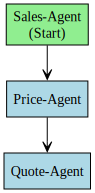

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [13]:
image_path = "../imgs/home.png"
with open(image_path, "rb") as image_file:
    image_b64 = base64.b64encode(image_file.read()).decode()
image_uri = f"data:image/png;base64,{image_b64}"


In [14]:
message = ChatMessage(
        role=Role.USER,
        contents=[
            TextContent(text="Please find the relevant furniture according to the image and give the corresponding price for each piece of furniture"),
            DataContent(uri=image_uri, media_type="image/png")
        ]
)

In [15]:
result=''
async for event in workflow.run_stream(message):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)

In [16]:
result.replace("None", "")

"This beautifully designed living room includes modern furniture items that can make any space inviting and visually appealing. Here's a breakdown of the furniture pieces present in the image along with estimated pricing based on market trends for these types of furniture:\n\n---\n\n1. **White Sofa**  \n   - Description: A contemporary 3-seater fabric sofa in white, paired with multi-colored throw pillows.\n   - Approximate Price: $900 - $1,500  \n\n2. **Coffee Table**  \n   - Description: Oval-shaped coffee table with a white marble-like top and light gray wooden legs.\n   - Approximate Price: $250 - $450  \n\n3. **TV Console/Media Unit**  \n   - Description: A long, flat media console with storage drawers, a wooden surface, and a light oak finish.\n   - Approximate Price: $400 - $800  \n\n4. **Accent Chair**  \n   - Description: Modern navy/blue high-back armchair with short tapered legs.\n   - Approximate Price: $300 - $600  \n\n5. **Side Table (Near Accent Chair)**  \n   - Descript